# Caso Práctico: Modelo de Machine Learning para la Clasificación Automática de Semillas

## Contexto
En esta investigación se utilizaron siete tipos diferentes de frijoles secos (conocidos también como judías), teniendo en cuenta características como forma, tipo y estructura según la situación del mercado. Se desarrolló un sistema de visión por computadora para distinguir siete variedades diferentes registradas de frijol seco con características similares con el fin de obtener una clasificación uniforme de las semillas.

Para el modelo de clasificación se tomaron imágenes de 13.611 granos de site diferentes frijoles secos registrados con una cámara de alta resolución. Las imágenes de frijoles obtenidas mediante un sistema de visión por computadora se sometieron a etapas de segmentación y extracción de características, y se obtuvieron un total de dieciseis características; A partir de los granos se obtuvieron doce dimensiones y cuatro formas.

## Referencias

* Publicación de la investigación: Koklu, M., & Özkan, I.A. (2020). Multiclass classification of dry beans using computer vision and machine learning techniques. Comput. Electron. Agric., 174, 105507. <https://doi.org/10.1016/j.compag.2020.105507>
* Fuente de los datos: Dry Bean Dataset. (2020). UCI Machine Learning Repository. <https://doi.org/10.24432/C50S4B>.

## Criterios de Evaluación

Los puntos a evaluar serán los siguientes:

* Carga y preprocesamiento de datos: 2 puntos
* Aplicación de técnica de machine learning no supervisado para reducción de dimensiones: 2 puntos
* División de datos en conjuntos de entrenamiento y prueba: 1 punto
* Aplicación de algoritmos de aprendizaje supervisado: 2 puntos
* Evaluación de modelos de aprendizaje supervisado: 2 puntos
* Pregunta de reflexión: 1 punto

## Solución del Caso Práctico

### Librerías Requeridas

In [1]:
# Librerías necesarias para manipulación de datos
import pandas as pd
from pathlib import Path

# Librerías de scikit learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Librerías para evaluación de modelos
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Librería de modelos de machine learning a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Definir Semilla Aleatoria (_Random Seed_)

Para garantizar la reproducibilidad de tus resultados en machine learning, es importante establecer una semilla aleatoria (o random seed) consistente. Esto asegura que la división de los datos, la inicialización de los algoritmos y cualquier otro proceso aleatorio sean idénticos cada vez que ejecutes tu código. 

In [2]:
random_seed = 0

### Preparación de los Datos

In [3]:
# Define la ruta del fichero de datos
file_path = Path("../datos/dry_bean.csv")

# Crea un DataFrame con los datos del fichero de datos
data_raw = pd.read_csv(file_path)

# Muestra un ejemplo de los datos cargados
data_raw.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
# Muestra el tamaño del DataFrame con los datos originales
data_raw.shape

(13611, 17)

In [5]:
# Verificar si hay valores nulos
total_nan = data_raw.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")

Número total de valores nulos: 0


In [6]:
# Eliminar las columnas donde al menos un elemento es NaN
# data_clean = data_raw.dropna(axis=1, how="any")

In [7]:
# Verificar los tipos de datos
data_raw.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [8]:
# Crear una copia del conjunto de datos original
data_clean = data_raw.copy()

#### Transforma datos categoricos a numéricos

In [9]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

In [10]:
# Transformación de los datos con Label Encoder
class_numerico = label_encoder.fit_transform(data_clean['Class'])

In [11]:
# Categorías encontradas
print(label_encoder.classes_)

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [12]:
# Sustituir categorías en texto por numéricas
data_clean['Class'] = class_numerico

In [13]:
# Mostrar datos de ejemplo
data_clean.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


#### Normalización de Datos

In [14]:
# Separar la variable objetivo (target) de las características
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [15]:
# Crear el StandardScaler y normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Crear un nuevo DataFrame con los datos normalizados
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [17]:
# Ver las primeras filas del DataFrame normalizado
X_scaled_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


### Reducción de Dimensiones

In [18]:
# Función para crear un gráfico en 2D
def grafico_2d(x, y, colores):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, c=colores, alpha=0.7)
    plt.title("Reducción a 2 Componentes")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()
    
# Función para crear gráfico en 3D
def grafico_3d(x, y, z, colores):
    ax = plt.subplot(1, 2, 2, projection="3d")
    ax.scatter(x, y, z, c=colores, alpha=0.7)
    ax.set_title("Reducción a 3 Componentes")
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    ax.set_zlabel("Componente 3")
    plt.figure(figsize=(100, 60))
    plt.show()

In [19]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2, random_state=random_seed)
pca_components_2d = pca_2d.fit_transform(X_scaled_df)

# PCA para 3 componentes
pca_3d = PCA(n_components=3, random_state=random_seed)
pca_components_3d = pca_3d.fit_transform(X_scaled_df)

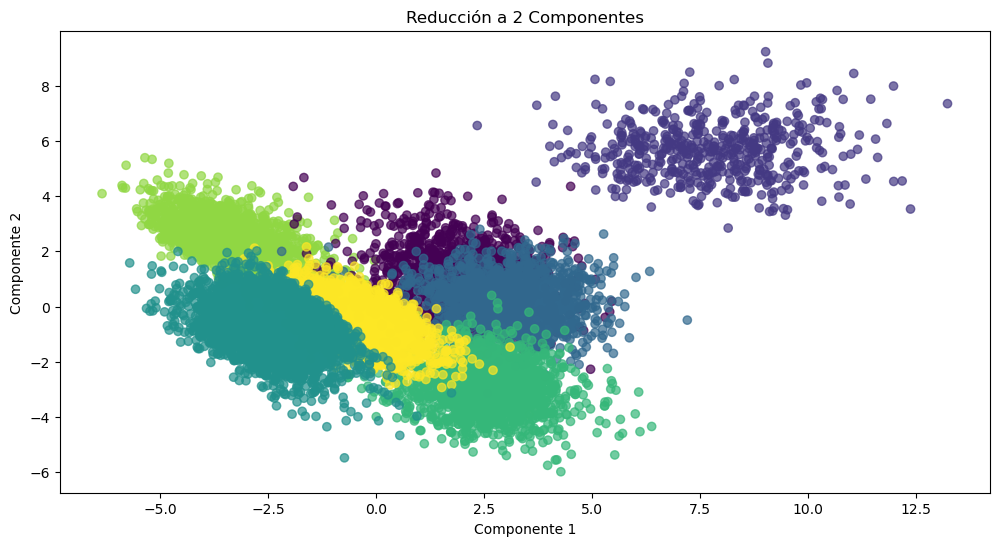

In [20]:
# Gráfico 2d
grafico_2d(pca_components_2d[:, 0], pca_components_2d[:, 1], data_clean['Class'])

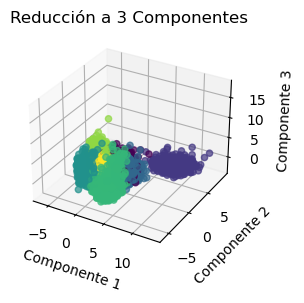

<Figure size 10000x6000 with 0 Axes>

In [21]:
# Gráfico 3D
grafico_3d(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], data_clean['Class'])

#### Cálculo de la varianza explicada

In [22]:
# Varianza explicada para 2 y 3 componentes
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Cálculo de la varianza explicada acumulada
cumulative_variance_2d = explained_variance_2d.sum()
cumulative_variance_3d = explained_variance_3d.sum()

# Mostrar resultados
print(f"Varianza explicada PCA2: {explained_variance_2d}")
print(f"Varianza acumulada PCA2: {cumulative_variance_2d}")
print(f"Varianza explicada PCA3: {explained_variance_3d}")
print(f"Varianza acumulada PCA3: {cumulative_variance_3d}")

Varianza explicada PCA2: [0.55466439 0.26430973]
Varianza acumulada PCA2: 0.8189741181789998
Varianza explicada PCA3: [0.55466439 0.26430973 0.08006564]
Varianza acumulada PCA3: 0.8990397603741644


### División de Datos en Conjuntos de Entrenamiento y Prueba

In [23]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pca_components_3d, y, test_size=0.3, random_state=random_seed)

In [24]:
# Opcional: Mostrar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño del conjunto de entrenamiento (target):", y_train.shape)
print("Tamaño del conjunto de prueba (target):", y_test.shape)

Tamaño del conjunto de entrenamiento: (9527, 3)
Tamaño del conjunto de prueba: (4084, 3)
Tamaño del conjunto de entrenamiento (target): (9527,)
Tamaño del conjunto de prueba (target): (4084,)


### Entrenamiento de Modelos de ML Supervisado

In [25]:
# Crear y almacenar los modelos en un diccionario
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=random_seed),
    "SVM": SVC(probability=True, random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "GBM": GradientBoostingClassifier(random_state=random_seed),
}

In [26]:
# Entrenar cada modelo con los datos de entrenamiento
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

### Evaluación de los Modelos

Para cada modelo en el conjunto de modelos, se realizan las siguientes tareas:
* Hacer predicciones en el conjunto de prueba.
* Calcular la matriz de confusión y el reporte de clasificación.

In [27]:
# Crear un DataFrame para almacenar las métricas resumidas de evaluación
evaluacion = pd.DataFrame(columns=["Modelo", "Precision", "Recall", "F1-Score", "Accuracy"])

for nombre, modelo in modelos.items():
    # Hacer predicciones
    y_pred = modelo.predict(X_test)
    # y_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

    # Calcular métricas
    matriz_conf = confusion_matrix(y_test, y_pred)
    reporte_clas = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    # Extraer precision, recall y f1-score para la clase positiva
    precision = reporte_clas['1']['precision']
    recall = reporte_clas['1']['recall']
    f1_score = reporte_clas['1']['f1-score']

    # Imprimir las métricas para cada modelo
    print(f"Modelo: {nombre}")
    print("Matriz de Confusión:\n", matriz_conf)
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
    print("*"*80)

    # Almacenar métricas resumidas en el DataFrame
    evaluacion = evaluacion.append({
        "Modelo": nombre,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Accuracy": accuracy
    }, ignore_index=True)

# Mostrar la tabla comparativa de precision, recall, f1-score, AUC y accuracy para cada modelo
evaluacion

Modelo: Regresión Logística
Matriz de Confusión:
 [[262   0  94   0   3   3  27]
 [  0 134   0   0   0   0   0]
 [ 78   0 409   0   7   2   5]
 [  0   0   0 984   2  13  58]
 [  4   0   6   4 565   0  15]
 [  4   0   0   5   0 543  27]
 [  1   0   1  74  27  11 716]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       389
           1       1.00      1.00      1.00       134
           2       0.80      0.82      0.81       501
           3       0.92      0.93      0.93      1057
           4       0.94      0.95      0.94       594
           5       0.95      0.94      0.94       579
           6       0.84      0.86      0.85       830

    accuracy                           0.88      4084
   macro avg       0.89      0.88      0.88      4084
weighted avg       0.88      0.88      0.88      4084

********************************************************************************
Modelo: SVM
Matriz de Confu

,Modelo,Precision,Recall,F1-Score,Accuracy
0,Regresión Logística,1.0,1.0,1.0,0.884672
1,SVM,1.0,1.0,1.0,0.891773
2,Random Forest,1.0,1.0,1.0,0.880264
3,GBM,1.0,1.0,1.0,0.880999
